# **Chaînes de Markov : propagation d'une épidémie dans une population**

(Import pour la suite du projet)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

## 1 - Description du premier modèle

1. Il y'a 3 états dans le modèle présenté. La taille du vecteur initial est égale à 3 (3 états) et la matrice de transition comporte 3 lignes et 3 colonnes.

2. le vecteur $ \pi_0 $ de probabilité initiale est : $ \mathbf{\pi_0 } = \begin{bmatrix} 0.9 \\ 0.1 \\ 1 \end{bmatrix}  $

3. La matrice de transaction A est : A = $  \begin{bmatrix} 0.92 & 0.08 & 0 \\ 0 & 0.93 & 0.07 \\ 0 & 0 & 1 \end{bmatrix} $ 

4. Creation d'une fonction  permettant de vérifier qu’une matrice est stochastique et vérifier que A est stochastique :

In [2]:

def est_stochastique(matrice):
    """
    Retourne 1 si la matrice est stochastique, 0 sinon
    """
    if (matrice<0).any():
        return 0
    
    ligne, colonne = matrice.shape
    
    if (ligne != colonne):
        return 0
    
    if not np.allclose(matrice.sum(axis=1), np.ones(ligne)):
        return 0
    
    return 1


In [3]:
a = np.array([[0.92,0.08,0],[0,0.93,0.07], [0,0,1]])
est_stochastique(a)

print(a)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.   0.   1.  ]]


### 1.1 - Distribution théorique


1. le vecteur $ \pi_1 $ de probabilité au teps t=1 est : $ \begin{bmatrix} 0.9 \times 0.92 & 0.9 \times 0.08 + 0.1 \times 0.93 & 0.1 \times 0.07 \end{bmatrix} = \begin{bmatrix} 0.828 \\ 0.165 \\ 0.007 \end{bmatrix}  $

     la probabilité pour un individu d’être sain au temps t=1 est : $ P(X_1 = S) = 0.828  $
      
     la probabilité pour un individu d’être infecté au temps t=1 :  $ P(X_1 = I) = 0.165  $
     
     la probabilité pour un individu d’être guéri au temps t=1 est : $ P(X_1 = G) = 0.007   $

2. Le vecteur $ \pi_2 $ de probabilité au teps t=1 est :  $ \begin{bmatrix} 0.828 \times 0.92  & 0.828 \times 0.08 + 0.165 \times 0.93 & 0.165 \times 0.07 + 0.007 \times 1 \end{bmatrix} = \mathbf{\pi_2 } = \begin{bmatrix} 0.76176 \\ 0.21969 \\ 0.01855
\end{bmatrix}  $

     la probabilité pour un individu d’être sain au temps t=2 est : $ P(X_2 = S) = 0.76176   $
  
     la probabilité pour un individu d’être infecté au temps t=2 :  $ P(X_2 = I) = 0.21969  $
  
     la probabilité pour un individu d’être guéri au temps t=2 est : $ P(X_2 = G) = 0.01855  $

In [4]:
def Produit_matrice_vecteur(vecteur_init,matrice,t):
    result = vecteur_init
    for i in range(0,t):
        result=np.dot(result,matrice)
    return result

In [5]:
# Definition de la matrice de transaction et le vecteur 𝜋0 de probabilité initiale
vecteur_initial = np.array([0.9, 0.1, 0])
matrice_transition = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])
# Le vecteur de probabilité au temps t=1 en multipliant t1 par A
t1 = Produit_matrice_vecteur(vecteur_initial,matrice_transition,1)
print(t1)

# Le vecteur de probabilité au temps t=1 en multipliant t1 par A
t2 = Produit_matrice_vecteur(vecteur_initial,matrice_transition,2)
print(t2)
        
        

[0.828 0.165 0.007]
[0.76176 0.21969 0.01855]


3. Pour calculer la distribution théorique des effectifs dans chaque états, on code une fonction qui va multiplier le vecteur de probabilité $\pi{_i}$ au temps $t_i$:

In [6]:
vecteur_initial = np.array([0.9, 0.1, 0])
matrice_transition = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])
distribution_theorique =[]
for i in range(1, 201):
    t = Produit_matrice_vecteur(vecteur_initial, matrice_transition,i)
    distribution_theorique.append(t)
    print(t)
# pas besoin de mettre à jour le vecteur initiale dans cette fonction, c'est parceque je le fais dans ma fonction Produit_matrice_vecteur(result = vecteur_init)  

[0.828 0.165 0.007]
[0.76176 0.21969 0.01855]
[0.7008192 0.2652525 0.0339283]
[0.64475366 0.30275036 0.05249598]
[0.59317337 0.33313813 0.0736885 ]
[0.5457195  0.35727233 0.09700817]
[0.50206194 0.37592083 0.12201723]
[0.46189699 0.38977132 0.14833169]
[0.42494523 0.39943909 0.17561568]
[0.39094961 0.40547397 0.20357642]
[0.35967364 0.40836676 0.2319596 ]
[0.33089975 0.40855498 0.26054527]
[0.30442777 0.40642811 0.28914412]
[0.28007355 0.40233237 0.31759409]
[0.25766766 0.39657498 0.34575735]
[0.23705425 0.38942815 0.3735176 ]
[0.21808991 0.38113252 0.40077757]
[0.20064272 0.37190043 0.42745685]
[0.1845913  0.36191882 0.45348988]
[0.169824   0.35135181 0.4788242 ]
[0.15623808 0.3403431  0.50341882]
[0.14373903 0.32901813 0.52724284]
[0.13223991 0.31748598 0.55027411]
[0.12166072 0.30584116 0.57249813]
[0.11192786 0.29416513 0.59390701]
[0.10297363 0.2825278  0.61449857]
[0.09473574 0.27098875 0.63427551]
[0.08715688 0.25959839 0.65324473]
[0.08018433 0.24839906 0.67141661]
[0.07376958 

4. Représentez graphiquement la probabilité d’être dans chaque état en fonction du temps

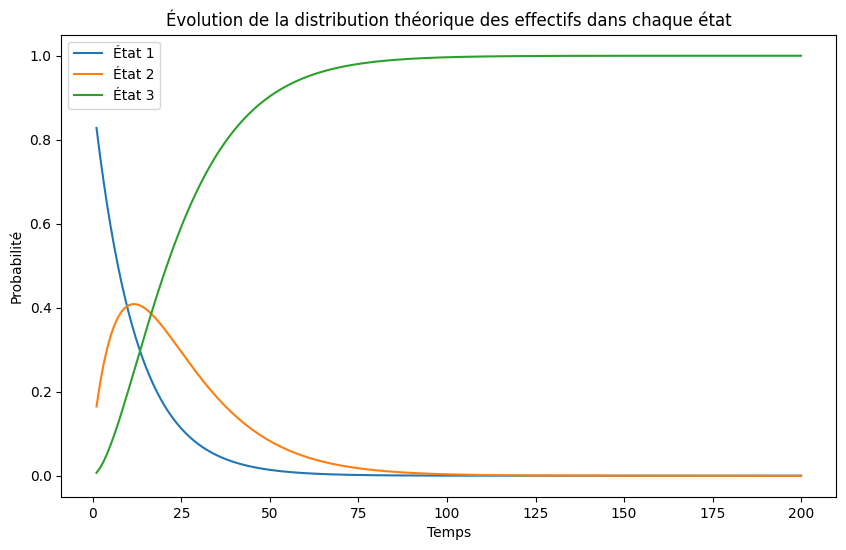

In [7]:
distribution_theorique = np.array(distribution_theorique)
plt.figure(figsize=(10, 6))

for etat in range(len(vecteur_initial)):
    plt.plot(range(1, 201), distribution_theorique[:, etat], label=f'État {etat + 1}')
    
plt.legend()
plt.title('Évolution de la distribution théorique des effectifs dans chaque état')
plt.xlabel('Temps')
plt.ylabel('Probabilité')

plt.show()


### 1.2 Distribution observée

#### 1.2.1 Tirage aléatoire des états


Création d'une fonction permettant de générer une séquence aléatoire de taille T avec cette chaîne de
Markov. (Indice : tirer au hasard le premier état en utilisant $ \pi_0 $ ; puis tirer au hasard les états suivants
en suivant les probabilités de transition).

In [8]:
def  générer_séquence(T,vecteur_init,matrice):
    # Choisir un état initial au hasard en utilisant les probabilités de π0
    etats_labels = ["S", "I", "R"]
    sequence = [etats_labels[np.random.choice(len(vecteur_init), p=vecteur_init)]]
    # choisir chaque état suivant en utilisant les probabilités de transition définies par la matrice de transition
    for t in range(1,T):
        # Récupèrer le dernier état ajouté à la séquence
        etat_actuel = sequence[-1]
        # Extrait la ligne de la matrice de transition  correspondant à l'état actuel. Cela donne les probabilités de transition de l'état actuel vers tous les autres états
        prob_transition = matrice_transition[etats_labels.index(etat_actuel), :]
        # Tirer au hasard le prochain état en fonction des probabilités de transition
        prochain_etat = np.random.choice(etats_labels, p=prob_transition)
        # Ajouter le prochain état à la séquence, complétant ainsi l'itération de la boucle
        sequence.append(prochain_etat)
    return sequence

In [9]:
vecteur_initial = np.array([0.9, 0.1, 0])
matrice_transition = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])
T = 150
générer_séquence(T,vecteur_initial,matrice_transition)

['S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R']

#### 1.2.2 Modélisation d’une population

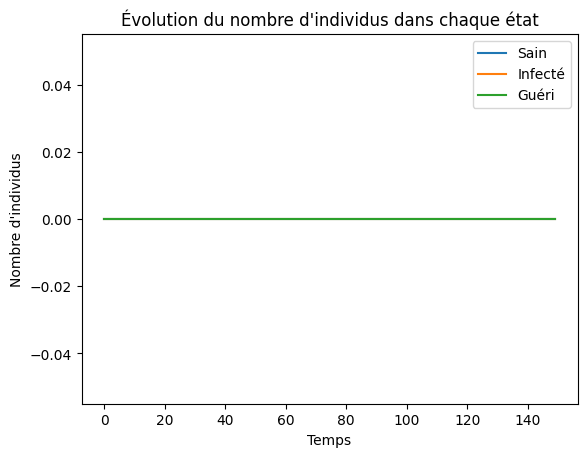

In [10]:
vecteur_initial = np.array([0.9, 0.1, 0])
matrice_transition = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])

nombre_individus = 200
nb = np.zeros((T, 3))
def Evolution_sequences(nombre_individus, matrice, T,vecteur_init ):
    for t in range(T):
        nb_sain = 0
        nb_infecté = 0
        nb_guéri = 0
        # Génération de la séquence pour chaque individu dans la population
        sequences_individus = [générer_séquence(T, vecteur_initial, matrice_transition) for _ in range(nombre_individus)]
        for i in range(0,nombre_individus):
            # Récupérer l'état actuel de l'individu à un instant donné dans la séquence générée pour cet individu
            etat_actuel = sequences_individus[i][t]
            # Mise à jour des compteurs
            if etat_actuel == "S":
                nb_sain += 1
            elif etat_actuel == "I":
                nb_infecté += 1
            elif etat_actuel == "R":
                nb_guéri += 1
        # Enregistrement des compteurs pour cet instant t
        nb[t, :] = [nb_sain, nb_infecté, nb_guéri]
        # Le tableau nb est une matrice où chaque ligne représente une étape temporelle et chaque colonne représente le nombre d'individus dans un état spécifique.

# Tracer les courbes d'évolution du nombre d'individus dans chaque état
temps = np.arange(T) #  permet de générer une séquence d'indices temporels pour chaque instant tt 
plt.plot(temps, nb[:, 0], label='Sain')
plt.plot(temps, nb[:, 1], label='Infecté')
plt.plot(temps, nb[:, 2], label='Guéri')

plt.title('Évolution du nombre d\'individus dans chaque état')
plt.xlabel('Temps')
plt.ylabel('Nombre d\'individus')
plt.legend()
plt.show()
    

2. Afficher le pourcentage d’indivudus sains infectés et guéris en fonction du temps

In [11]:
def Pourcentage(nb, nombre_individus): 
        pourcentages_sains = (nb[:, 0] / nombre_individus) * 100
        pourcentages_infectes = (nb[:, 1] / nombre_individus) * 100
        pourcentages_gueris = (nb[:, 2] / nombre_individus) * 100
        return pourcentages_sains, pourcentages_infectes, pourcentages_gueris

## 2 - Description du second modèle

### 2.1 - Analyse du second modèle

1. De la même manière que pour le premier modèle, l'estimation de l'état suivant dépend de l'état présent qui est connu. Ce processus peut donc bien être modélisé par une chaîne de Markov.

2. La nouvelle matrice de transition A est : A = $  \begin{bmatrix} 0.92 & 0.08 & 0 \\ 0 & 0.93 & 0.07 \\ 0.002 & 0 & 0.98 \end{bmatrix} $

3. 